In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 5-1

In [2]:

import tensorflow as tf

print(tf.__version__)
a=tf.random.uniform([2,3],0,1)
print(a)
print(type(a))

2.12.0
tf.Tensor(
[[0.43046355 0.4299997  0.34422493]
 [0.42556202 0.94083977 0.5478587 ]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


# 5-2

In [3]:

import tensorflow as tf
import numpy as np

t=tf.random.uniform([2,3],0,1)
n=np.random.uniform(0,1,[2,3])
print("tensorflow로 생성한 텐서:\n",t,"\n")
print("numpy로 생성한 ndarray:\n",n,"\n")

res=t+n # 텐서 t와 ndarray n의 덧셈
print("덧셈 결과:\n",res)

tensorflow로 생성한 텐서:
 tf.Tensor(
[[0.9732704  0.17373586 0.8321686 ]
 [0.5488086  0.34914792 0.2967782 ]], shape=(2, 3), dtype=float32) 

numpy로 생성한 ndarray:
 [[0.26028719 0.64419019 0.86830482]
 [0.08624274 0.96722889 0.24262719]] 

덧셈 결과:
 tf.Tensor(
[[1.2335576  0.81792605 1.7004733 ]
 [0.6350513  1.3163768  0.5394054 ]], shape=(2, 3), dtype=float32)


# 5-3

In [4]:
import tensorflow as tf
import keras.datasets as ds

# MNIST 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test)=ds.mnist.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8) # 원핫 코드로 변환
print("MNIST: ",x_train.shape,y_train.shape,yy_train.shape)

# CIFAR-10 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)
print("CIFAR-10: ",x_train.shape,y_train.shape,yy_train.shape)

# Boston Housing 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.boston_housing.load_data()
print("Boston Housing: ",x_train.shape,y_train.shape)

# Reuters 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.reuters.load_data()
print("Reuters: ",x_train.shape,y_train.shape)

11490434/11490434 [==============================] - 2s 0us/step
MNIST:  (60000, 28, 28) (60000,) (60000, 10)
170498071/170498071 [==============================] - 13s 0us/step
CIFAR-10:  (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
57026/57026 [==============================] - 0s 0us/step
Boston Housing:  (404, 13) (404,)
2110848/2110848 [==============================] - 1s 1us/step
Reuters:  (8982,) (8982,)


# 5-4

In [5]:
import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# [그림 4-3(b)]의 퍼셉트론
w=tf.Variable([[1.0],[1.0]])
b=tf.Variable(-0.5)

# 식 4.3의 퍼셉트론 동작
s=tf.add(tf.matmul(x,w),b)
o=tf.sign(s)

print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


# 5-5

In [6]:
import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# 가중치 초기화
w=tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b=tf.Variable(tf.zeros([1]))

# 옵티마이저
opt=tf.keras.optimizers.SGD(learning_rate=0.1)

# 전방 계산(식 (4.3))
def forward():
    s=tf.add(tf.matmul(x,w),b)
    o=tf.tanh(s)
    return o

# 손실 함수 정의
def loss():
    o=forward()
    return tf.reduce_mean((y-o)**2)

# 500세대까지 학습(100세대마다 학습 정보 출력)
for i in range(500):
    opt.minimize(loss, var_list=[w,b])
    if(i%100==0): print('loss at epoch',i,'=',loss().numpy())

# 학습된 퍼셉트론으로 OR 데이터를 예측
o=forward()
print(o)

loss at epoch 0 = 0.56044734
loss at epoch 100 = 0.086529866
loss at epoch 200 = 0.041008435
loss at epoch 300 = 0.026044615
loss at epoch 400 = 0.018856129
tf.Tensor(
[[-0.8173661]
 [ 0.8869975]
 [ 0.8869987]
 [ 0.9992795]], shape=(4, 1), dtype=float32)


# 5-6

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

n_input=2
n_output=1

perceptron=Sequential()
perceptron.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))

perceptron.compile(loss='mse',optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 0s - loss: 1.0340 - mse: 1.0340 - 347ms/epoch - 347ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7693 - mse: 0.7693 - 9ms/epoch - 9ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6519 - mse: 0.6519 - 9ms/epoch - 9ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5953 - mse: 0.5953 - 9ms/epoch - 9ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5616 - mse: 0.5616 - 8ms/epoch - 8ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5376 - mse: 0.5376 - 9ms/epoch - 9ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5185 - mse: 0.5185 - 8ms/epoch - 8ms/step
Epoch 8/500
1/1 - 0s - loss: 0.5019 - mse: 0.5019 - 8ms/epoch - 8ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4869 - mse: 0.4869 - 8ms/epoch - 8ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4730 - mse: 0.4730 - 10ms/epoch - 10ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4597 - mse: 0.4597 - 8ms/epoch - 8ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4471 - mse: 0.4471 - 8ms/epoch - 8ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4349 - mse: 0.4349 - 9ms/epoch - 9ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4232 - ms

# 5-7

Epoch 1/30
469/469 - 2s - loss: 0.0424 - accuracy: 0.8458 - val_loss: 0.0264 - val_accuracy: 0.9133 - 2s/epoch - 4ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0223 - accuracy: 0.9297 - val_loss: 0.0185 - val_accuracy: 0.9420 - 2s/epoch - 4ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0166 - accuracy: 0.9477 - val_loss: 0.0150 - val_accuracy: 0.9516 - 2s/epoch - 4ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0139 - accuracy: 0.9572 - val_loss: 0.0127 - val_accuracy: 0.9602 - 1s/epoch - 3ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0122 - accuracy: 0.9629 - val_loss: 0.0121 - val_accuracy: 0.9626 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0110 - accuracy: 0.9679 - val_loss: 0.0111 - val_accuracy: 0.9656 - 1s/epoch - 3ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0102 - accuracy: 0.9714 - val_loss: 0.0104 - val_accuracy: 0.9666 - 1s/epoch - 3ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0095 - accuracy: 0.9739 - val_loss: 0.0105 - val_accuracy: 0.9688 - 1s/epoch - 3ms/step
Epoch 9/30
469/469 - 1s 

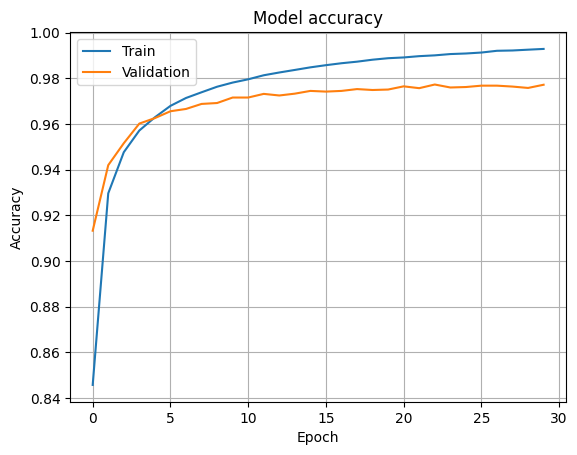

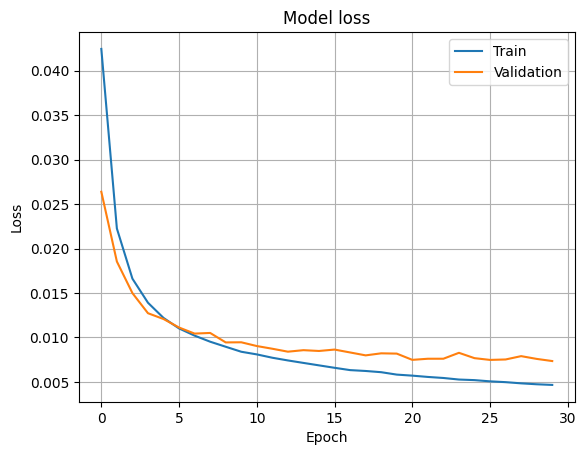

In [8]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)
import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

# 5-8

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/30
469/469 - 2s - loss: 0.0813 - accuracy: 0.6153 - val_loss: 0.0320 - val_accuracy: 0.8223 - 2s/epoch - 4ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0303 - accuracy: 0.8457 - val_loss: 0.0297 - val_accuracy: 0.8334 - 2s/epoch - 4ms/step
Epoch 3/30
469/469 - 3s - loss: 0.0273 - accuracy: 0.8582 - val_loss: 0.0273 - val_accuracy: 0.8534 - 3s/epoch - 6ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0250 - accuracy: 0.8674 - val_loss: 0.0265 - val_accuracy: 0.8550 - 2s/epoch - 4ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0236 - accuracy: 0.8758 - val_loss: 0.0244 - val_accuracy: 0.8631 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0225 - accuracy: 0.8811 - val_loss: 0.0226 - val_accuracy: 0.8698 - 1s/epoch - 3ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0215 - accuracy: 0.8861 - val_loss: 0.0230 - val_accuracy: 0.8682 - 1s/epoch - 3ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0207 - accuracy: 0.8892 - val_loss: 0.0220 - val_

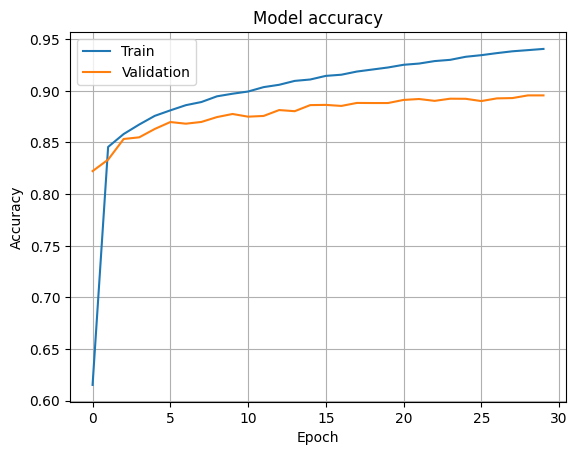

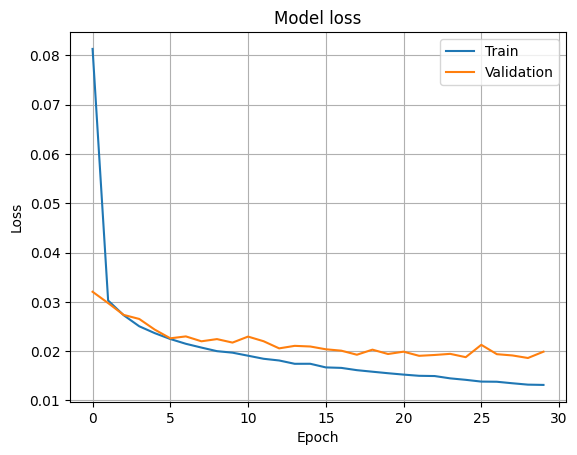

In [9]:
#5-8
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# fashion MNIST 데이터셋을 읽어와 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)
import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

# 5-9

Epoch 1/30
469/469 - 3s - loss: 0.0260 - accuracy: 0.8970 - val_loss: 0.0126 - val_accuracy: 0.9470 - 3s/epoch - 5ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0099 - accuracy: 0.9544 - val_loss: 0.0083 - val_accuracy: 0.9602 - 2s/epoch - 5ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0067 - accuracy: 0.9682 - val_loss: 0.0062 - val_accuracy: 0.9687 - 1s/epoch - 3ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0051 - accuracy: 0.9756 - val_loss: 0.0062 - val_accuracy: 0.9652 - 1s/epoch - 3ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0042 - accuracy: 0.9803 - val_loss: 0.0055 - val_accuracy: 0.9740 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0037 - accuracy: 0.9825 - val_loss: 0.0051 - val_accuracy: 0.9738 - 1s/epoch - 3ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0032 - accuracy: 0.9850 - val_loss: 0.0043 - val_accuracy: 0.9760 - 1s/epoch - 3ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0028 - accuracy: 0.9874 - val_loss: 0.0044 - val_accuracy: 0.9751 - 1s/epoch - 3ms/step
Epoch 9/30
469/469 - 1s 

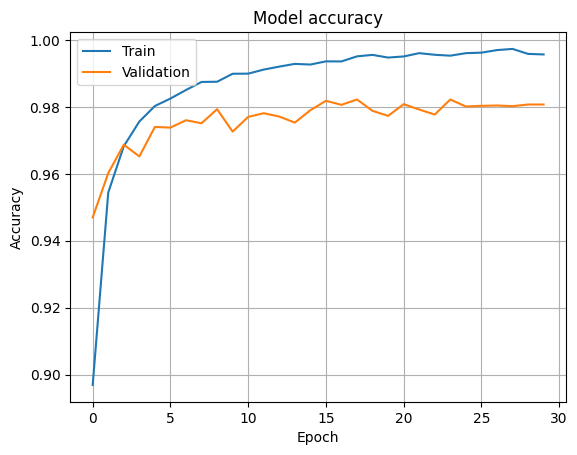

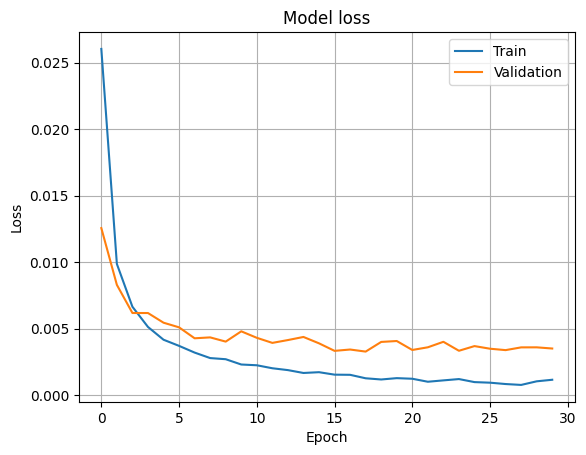

In [10]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 신경망 구조 설계
mlp=Sequential()
mlp.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망의 정확률 측정
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

# 5-10

Epoch 1/30
469/469 - 2s - loss: 0.0163 - accuracy: 0.8935 - val_loss: 0.0109 - val_accuracy: 0.9281 - 2s/epoch - 5ms/step
Epoch 2/30
469/469 - 1s - loss: 0.0098 - accuracy: 0.9364 - val_loss: 0.0083 - val_accuracy: 0.9476 - 1s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0075 - accuracy: 0.9529 - val_loss: 0.0070 - val_accuracy: 0.9546 - 1s/epoch - 3ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0060 - accuracy: 0.9619 - val_loss: 0.0063 - val_accuracy: 0.9611 - 1s/epoch - 3ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0050 - accuracy: 0.9689 - val_loss: 0.0052 - val_accuracy: 0.9662 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0043 - accuracy: 0.9728 - val_loss: 0.0048 - val_accuracy: 0.9689 - 2s/epoch - 4ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0037 - accuracy: 0.9778 - val_loss: 0.0046 - val_accuracy: 0.9703 - 2s/epoch - 4ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0032 - accuracy: 0.9815 - val_loss: 0.0046 - val_accuracy: 0.9701 - 2s/epoch - 4ms/step
Epoch 9/30
469/469 - 1s 

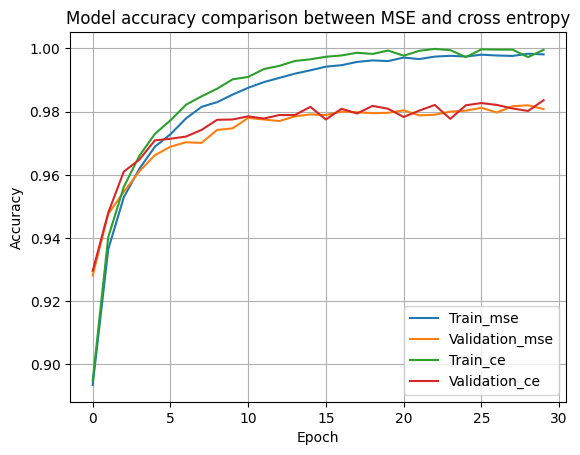

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 평균제곱오차를 사용한 모델
dmlp_mse=Sequential()
dmlp_mse.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_mse.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_mse.add(Dense(units=n_output,activation='softmax'))
dmlp_mse.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_mse=dmlp_mse.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 교차 엔트로피를 사용한 모델
dmlp_ce=Sequential()
dmlp_ce.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_ce.add (Dense(units=n_output,activation='softmax'))
dmlp_ce.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_ce=dmlp_ce.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 두 모델의 정확률 비교
res_mse=dmlp_mse.evaluate(x_test,y_test,verbose=0)
print("평균제곱오차의 정확률은",res_mse[1]*100)
res_ce=dmlp_ce.evaluate(x_test,y_test,verbose=0)
print("교차 엔트로피의 정확률은",res_ce[1]*100)

# 하나의 그래프에서 두 모델을 비교
import matplotlib.pyplot as plt
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparison between MSE and cross entropy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_mse','Validation_mse','Train_ce','Validation_ce'], loc='best')
plt.grid()
plt.show()

# 5-11

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/50
235/235 - 7s - loss: 1.3274 - accuracy: 0.6266 - val_loss: 0.8272 - val_accuracy: 0.7088 - 7s/epoch - 29ms/step
Epoch 2/50
235/235 - 2s - loss: 0.7037 - accuracy: 0.7639 - val_loss: 0.6455 - val_accuracy: 0.7774 - 2s/epoch - 7ms/step
Epoch 3/50
235/235 - 2s - loss: 0.5923 - accuracy: 0.7992 - val_loss: 0.6246 - val_accuracy: 0.7747 - 2s/epoch - 8ms/step
Epoch 4/50
235/235 - 3s - loss: 0.5421 - accuracy: 0.8134 - val_loss: 0.5770 - val_accuracy: 0.8003 - 3s/epoch - 11ms/step
Epoch 5/50
235/235 - 2s - loss: 0.5051 - accuracy: 0.8253 - val_loss: 0.5538 - val_accuracy: 0.8064 - 2s/epoch - 7ms/step
Epoch 6/50
235/235 - 2s - loss: 0.4867 - accuracy: 0.8292 - val_loss: 0.5548 - val_accuracy: 0.7973 - 2s/epoch - 7ms/step
Epoch 7/50
235/235 - 2s - loss: 0.4664 - accuracy: 0.8370 - val_loss: 0.5479 - val_accuracy: 0.7900 - 2s/epoch - 7ms/step
Epoch 8/50
235/235 - 1s - loss: 0.4525 - accuracy: 0.8406 - val_loss: 0.4829 - va

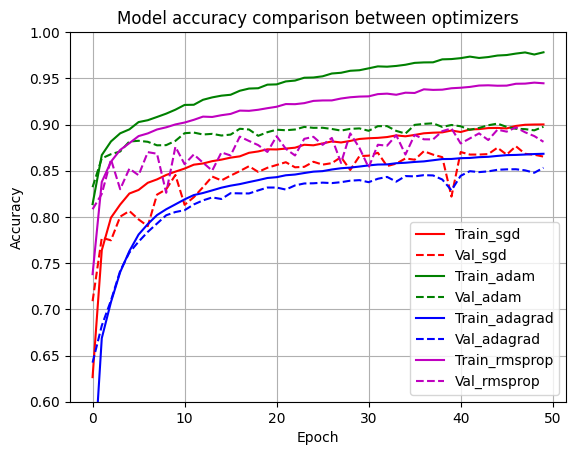

In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam,Adagrad,RMSprop

# fashion MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이퍼 매개변수 설정
batch_siz=256
n_epoch=50

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
    model=Sequential()
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

# SGD 옵티마이저를 사용하는 모델
dmlp_sgd=build_model()
dmlp_sgd.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])
hist_sgd=dmlp_sgd.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adam 옵티마이저를 사용하는 모델
dmlp_adam=build_model()
dmlp_adam.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist_adam=dmlp_adam.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adagrad 옵티마이저를 사용하는 모델
dmlp_adagrad=build_model()
dmlp_adagrad.compile(loss='categorical_crossentropy',optimizer=Adagrad(),metrics=['accuracy'])
hist_adagrad=dmlp_adagrad.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# RMSprop 옵티마이저를 사용하는 모델
dmlp_rmsprop=build_model()
dmlp_rmsprop.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
hist_rmsprop=dmlp_rmsprop.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# 네 모델의 정확률을 출력
print("SGD 정확률은",dmlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adam 정확률은",dmlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adagrad 정확률은",dmlp_adagrad.evaluate(x_test,y_test,verbose=0)[1]*100)
print("RMSprop 정확률은",dmlp_rmsprop.evaluate(x_test,y_test,verbose=0)[1]*100)

import matplotlib.pyplot as plt

# 네 모델의 정확률을 하나의 그래프에서 비교
plt.plot(hist_sgd.history['accuracy'],'r')
plt.plot(hist_sgd.history['val_accuracy'],'r--')
plt.plot(hist_adam.history['accuracy'],'g')
plt.plot(hist_adam.history['val_accuracy'],'g--')
plt.plot(hist_adagrad.history['accuracy'],'b')
plt.plot(hist_adagrad.history['val_accuracy'],'b--')
plt.plot(hist_rmsprop.history['accuracy'],'m')
plt.plot(hist_rmsprop.history['val_accuracy'],'m--')
plt.title('Model accuracy comparison between optimizers')
plt.ylim((0.6,1.0))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_sgd','Val_sgd','Train_adam','Val_adam','Train_adagrad','Val_adagrad','Train_rmsprop','Val_rmsprop'], loc='best')
plt.grid()
plt.show()

# 5-12

11490434/11490434 [==============================] - 2s 0us/step
SGD: 0.9470833301544189
Adam: 0.9787000179290771
Adagrad: 0.9148166656494141
RMSprop: 0.97868332862854


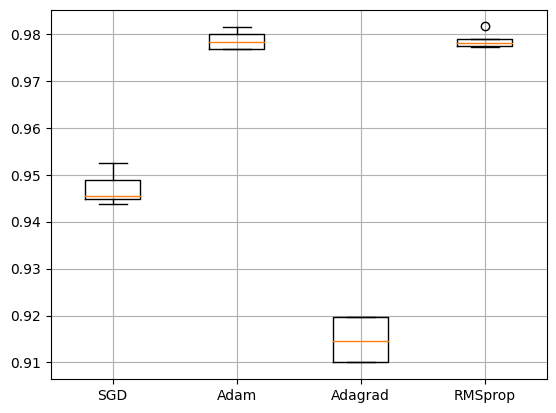

In [2]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam,Adagrad,RMSprop
from sklearn.model_selection import KFold

# fashion MNIST를 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이퍼 매개변수 설정
batch_siz=256
n_epoch=20
k=5 # 5-겹

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
    model=Sequential()
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

# 교차 검증을 해주는 함수(서로 다른 옵티마이저(opt)에 대해)
def cross_validation(opt):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]
        dmlp=build_model()
        dmlp.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
        dmlp.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
        accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 옵티마이저 4개에 대해 교차 검증을 실행
acc_sgd=cross_validation(SGD())
acc_adam=cross_validation(Adam())
acc_adagrad=cross_validation(Adagrad())
acc_rmsprop=cross_validation(RMSprop())

# 옵티마이저 4개의 정확률을 비교
print("SGD:",np.array(acc_sgd).mean())
print("Adam:",np.array(acc_adam).mean())
print("Adagrad:",np.array(acc_adagrad).mean())
print("RMSprop:",np.array(acc_rmsprop).mean())

import matplotlib.pyplot as plt

# 네 옵티마이저의 정확률을 박스플롯으로 비교
plt.boxplot([acc_sgd,acc_adam,acc_adagrad,acc_rmsprop],labels=["SGD","Adam","Adagrad","RMSprop"])
plt.grid()